In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("DIARIO-2013A2018.csv", encoding = "ISO-8859-1", index_col=0)

In [61]:
df.head()

,SEMANA_DO_ANO,PRODUTO,FAMILIA_PRODUTO,QUANT_VENDIDA,CLIENTES,DIASEMANA,FERIADO_PROXIMO
DATA_VENDA,,,,,,,
02/01/13,1,627,101,1578,6,QUARTA-FEIRA,1
02/01/13,1,399,105,1288,7,QUARTA-FEIRA,1
02/01/13,1,474,105,592,7,QUARTA-FEIRA,1
02/01/13,1,412,103,563,7,QUARTA-FEIRA,1
02/01/13,1,7503,107,480,2,QUARTA-FEIRA,1


In [62]:
df.shape

(214284, 7)

In [63]:
df.isnull().sum() #O quanto temos de dados nulos?

SEMANA_DO_ANO      0
PRODUTO            0
FAMILIA_PRODUTO    0
QUANT_VENDIDA      0
CLIENTES           0
DIASEMANA          0
FERIADO_PROXIMO    0
dtype: int64

In [64]:
df.FERIADO_PROXIMO.unique() 

array([ 1,  2,  9, -2, -1,  0], dtype=int64)

In [65]:
df['FERIADO_PROXIMO'] = df['FERIADO_PROXIMO'].astype(int)

In [66]:
df = pd.get_dummies(df, columns=['DIASEMANA'])

In [67]:
df = pd.get_dummies(df, columns=['FAMILIA_PRODUTO'])

In [68]:
df.index = pd.to_datetime(df.index, dayfirst=True)

In [69]:
df['ANO'] = df.index.year
df['MES'] = df.index.month
df['DIA'] = df.index.day

In [70]:
df.head()

,SEMANA_DO_ANO,PRODUTO,QUANT_VENDIDA,CLIENTES,FERIADO_PROXIMO,DIASEMANA_QUARTA-FEIRA,DIASEMANA_QUINTA-FEIRA,DIASEMANA_SEGUNDA-FEIRA,DIASEMANA_SEXTA-FEIRA,DIASEMANA_SÁBADO,...,FAMILIA_PRODUTO_123,FAMILIA_PRODUTO_125,FAMILIA_PRODUTO_127,FAMILIA_PRODUTO_128,FAMILIA_PRODUTO_130,FAMILIA_PRODUTO_209,FAMILIA_PRODUTO_1102,ANO,MES,DIA
DATA_VENDA,,,,,,,,,,,,,,,,,,,,,
2013-01-02,1,627,1578,6,1,1,0,0,0,0,...,0,0,0,0,0,0,0,2013,1,2
2013-01-02,1,399,1288,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,2013,1,2
2013-01-02,1,474,592,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,2013,1,2
2013-01-02,1,412,563,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,2013,1,2
2013-01-02,1,7503,480,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,2013,1,2


In [71]:
df.corr(method='spearman')

,SEMANA_DO_ANO,PRODUTO,QUANT_VENDIDA,CLIENTES,FERIADO_PROXIMO,DIASEMANA_QUARTA-FEIRA,DIASEMANA_QUINTA-FEIRA,DIASEMANA_SEGUNDA-FEIRA,DIASEMANA_SEXTA-FEIRA,DIASEMANA_SÁBADO,...,FAMILIA_PRODUTO_123,FAMILIA_PRODUTO_125,FAMILIA_PRODUTO_127,FAMILIA_PRODUTO_128,FAMILIA_PRODUTO_130,FAMILIA_PRODUTO_209,FAMILIA_PRODUTO_1102,ANO,MES,DIA
SEMANA_DO_ANO,1.000000,0.001242,-0.002709,-0.010264,-0.065871,-0.014281,-0.009084,0.005459,0.005788,-0.007263,...,0.001756,0.003895,-0.005977,0.006149,0.001146,0.000927,0.001950,-0.139921,0.986030,0.036922
PRODUTO,0.001242,1.000000,-0.402849,-0.362285,0.001760,0.008019,-0.017507,-0.020971,0.051693,-0.024045,...,0.022043,0.098374,0.010031,-0.002697,-0.003742,0.014000,0.097382,0.001366,0.001080,0.000449
QUANT_VENDIDA,-0.002709,-0.402849,1.000000,0.836403,-0.000960,0.005362,-0.015556,-0.023829,0.102721,-0.098787,...,-0.020871,-0.124346,0.046364,-0.017702,-0.002035,0.005351,-0.011188,-0.026173,-0.001958,0.005410
CLIENTES,-0.010264,-0.362285,0.836403,1.000000,0.003299,0.029118,-0.065783,-0.077891,0.197865,-0.084989,...,-0.000027,-0.114893,0.046900,0.003488,-0.003018,-0.011293,-0.099591,-0.030288,-0.010217,-0.009310
FERIADO_PROXIMO,-0.065871,0.001760,-0.000960,0.003299,1.000000,-0.028468,-0.014852,0.052125,0.001557,-0.006552,...,0.001716,-0.002159,-0.001345,0.001752,0.000732,-0.004764,0.008972,-0.016844,-0.072459,0.060777
DIASEMANA_QUARTA-FEIRA,-0.014281,0.008019,0.005362,0.029118,-0.028468,1.000000,-0.232240,-0.228247,-0.269996,-0.107666,...,-0.000943,0.002150,-0.001681,-0.001369,0.004309,0.000270,-0.003111,-0.000993,-0.019780,-0.007866
DIASEMANA_QUINTA-FEIRA,-0.009084,-0.017507,-0.015556,-0.065783,-0.014852,-0.232240,1.000000,-0.210873,-0.249444,-0.099471,...,0.002640,0.000500,0.003212,0.000376,-0.001001,0.000798,-0.019562,-0.004556,-0.010109,-0.000274
DIASEMANA_SEGUNDA-FEIRA,0.005459,-0.020971,-0.023829,-0.077891,0.052125,-0.228247,-0.210873,1.000000,-0.245155,-0.097760,...,0.002775,-0.002052,0.003827,0.001797,-0.000983,0.000914,-0.008363,-0.007663,0.010424,0.006724
DIASEMANA_SEXTA-FEIRA,0.005788,0.051693,0.102721,0.197865,0.001557,-0.269996,-0.249444,-0.245155,1.000000,-0.115642,...,-0.005729,0.004098,-0.009128,-0.004041,-0.001163,0.001179,0.034928,-0.017612,0.010330,-0.008389
DIASEMANA_SÁBADO,-0.007263,-0.024045,-0.098787,-0.084989,-0.006552,-0.107666,-0.099471,-0.097760,-0.115642,1.000000,...,0.001186,-0.007039,0.004649,0.005477,-0.000464,-0.001736,-0.011222,0.079448,-0.005576,0.030846


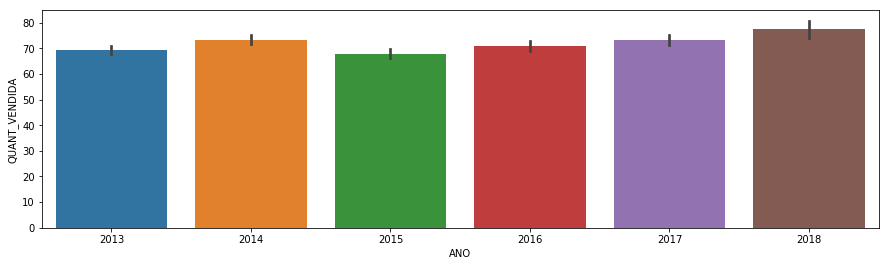

In [72]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='ANO', y='QUANT_VENDIDA', data=df, ax=axis1)

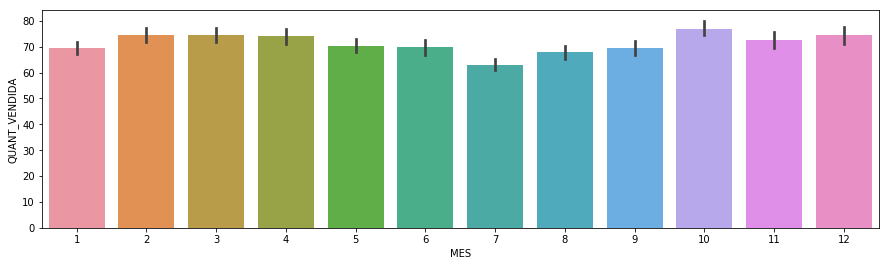

In [73]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

sns.barplot(x='MES', y='QUANT_VENDIDA', data=df, ax=axis1)

In [74]:
y = df.QUANT_VENDIDA.values
X = df.drop(['QUANT_VENDIDA'], axis = 1)

In [75]:
y

array([1578, 1288,  592, ...,    1,    1,    1], dtype=int64)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import neighbors 
from sklearn.svm import SVR
from sklearn import linear_model
from xgboost import XGBRegressor

In [78]:
#REGRESSÃO LINEAR
regr = LinearRegression(normalize=True) # cria o modelo
regr.fit(X_train, y_train) # treina o modelo

#KNN
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(X_train, y_train)

#RANDON FOREST
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 15)
rf.fit(X_train, y_train)

#ÁRVORE DE DECISÃO
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=21)
dtr.fit(X_train, y_train)


#GRADIENTE
gb = GradientBoostingRegressor(n_estimators=100, learning_rate = 1.0, max_depth = 2)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))
    #return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [80]:
y_test

array([646,   3,  26, ...,  11,   8, 173], dtype=int64)

In [87]:
pRegr = regr.predict(X_test)

error = rmsle(y_test, pRegr)
print('Erro Regressão Linear %.5f' % (error))

Erro Regressão Linear 128.02003


In [88]:
pKnn = knn.predict(X_test)

error = rmsle(y_test, pKnn)
print('Erro Knn %.5f' % (error))

Erro Knn 111.35852


In [89]:
pRf = rf.predict(X_test)

error = rmsle(y_test, pRf)
print('Erro Randon Forest %.5f' % (error))

Erro Randon Forest 101.74766


In [90]:
pDtr = dtr.predict(X_test)

error = rmsle(y_test, pDtr)
print('Erro Árvore de Decisão %.5f' % (error))

Erro Árvore de Decisão 133.17408


In [91]:
pGb = gb.predict(X_test)

error = rmsle(y_test, pGb)
print('Erro Gradiente %.5f' % (error))

Erro Gradiente 99.72030


## Gradiente

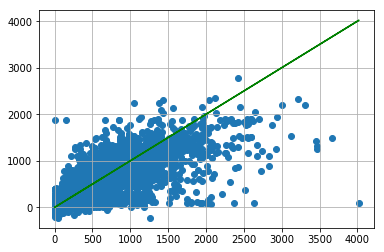

In [93]:
plt.clf() 
plt.scatter(y_test, pGb) # benchmark
plt.plot(y_test, y_test, color='green')
plt.grid(True)
plt.show()

In [94]:
val = pd.DataFrame()

In [95]:
val = pd.DataFrame(y_test)

In [97]:
val.columns = ['QUANT_VENDIDA']

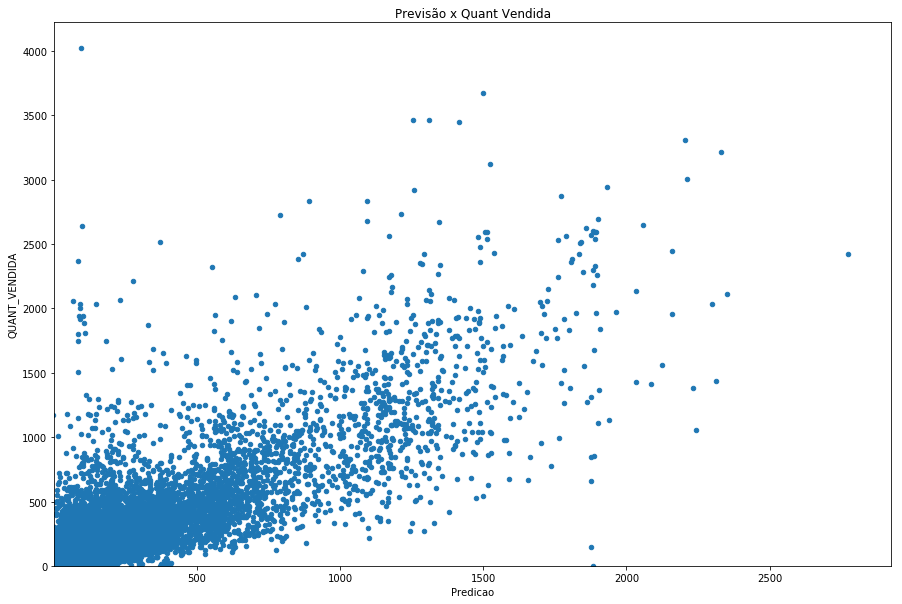

In [98]:
val.loc[:, 'Predicao'] = np.round(pGb)
val.plot.scatter(x='Predicao', y='QUANT_VENDIDA', figsize=(15,10), title='Previsão x Quant Vendida', 
                 ylim=(2), xlim=(3))

In [99]:
val.head(10)

,QUANT_VENDIDA,Predicao
0,646,205.0
1,3,-11.0
2,26,78.0
3,50,55.0
4,23,35.0
5,2,9.0
6,17,28.0
7,2,23.0
8,5,22.0
9,31,95.0
